### Tatiana Frolova
###                                                    Rhode Island Police Report

### Questions:
Questions:

1. Do the genders commit different violations?

2. Does gender affect who gets a ticket for speeding? Comparing speeding outcomes by gender?

3. Does gender affect whose vehicle is searched? Comparing search rates by gender?

4. Does gender affect whose vehicle was being stopped relater to drugs?

5. Distributions of overall stop outcomes by each year in order to see if traffic violation is increasing over the years of study, in order to see if traffic violations were increased through years of study.

6. How does the time of the day affect stop outcomes? in other words is there a specific time of the day with a high volume of traffic violations?

7. How does the day of the week affect stop outcomes, in other words on which day of the week do drives commit more traffic violations?

8. Distribution of stop outcomes by month of the year by summarizing total outcomes by each month of each year.

### Code 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### General data characteristics

In [8]:
# Data Police
police = pd.read_csv("police.csv")
police

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,1/4/2005,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,1/23/2005,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2/17/2005,4:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2/20/2005,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2/24/2005,1:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,RI,12/31/2015,21:21,NaN,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,RI,12/31/2015,21:59,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,RI,12/31/2015,22:04,NaN,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,RI,12/31/2015,22:09,NaN,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


In [39]:
#check for null vbalues example
police.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [40]:
# Data Shape
police.shape

(91741, 15)

In [10]:
# check data summary
police.describe(include = ["object"])

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_type,stop_outcome,is_arrested,stop_duration,district
count,91741,91741,91741,86536,86539,86539,86539,3307,86539,86539,86539,91741
unique,1,3757,1431,2,5,12,6,25,6,2,3,6
top,RI,2007-05-16,11:00,M,White,Speeding,Speeding,Incident to Arrest,Citation,False,0-15 Min,Zone X4
freq,91741,63,358,62762,61872,48424,48424,1290,77092,83461,69579,24279


In [6]:
# General info
police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               91741 non-null  object 
 1   stop_date           91741 non-null  object 
 2   stop_time           91741 non-null  object 
 3   county_name         0 non-null      float64
 4   driver_gender       86536 non-null  object 
 5   driver_race         86539 non-null  object 
 6   violation_raw       86539 non-null  object 
 7   violation           86539 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3307 non-null   object 
 10  stop_outcome        86539 non-null  object 
 11  is_arrested         86539 non-null  object 
 12  stop_duration       86539 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
 14  district            91741 non-null  object 
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+

In [18]:
# Data Type
police.dtypes

state                  object
stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
district               object
dtype: object

In [57]:
# Colomns Display
police.columns

Index(['state', 'stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop', 'district'],
      dtype='object')

In [58]:
# Data Size
police.size

1376115

### General data outcomes

In [59]:
# Violations by gender
police["driver_gender"].value_counts()

M    62762
F    23774
Name: driver_gender, dtype: int64

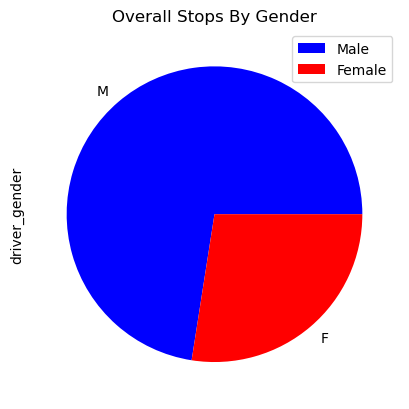

In [114]:
# Violations by gender vizualization
police["driver_gender"].value_counts().plot(kind = "pie", colors = ["Blue", "Red"], title = "Overall Stops By Gender")
plt.legend(["Male", "Female"])
plt.show()

In [60]:
# Violation by race
police["driver_race"].value_counts()

White       61872
Black       12285
Hispanic     9727
Asian        2390
Other         265
Name: driver_race, dtype: int64

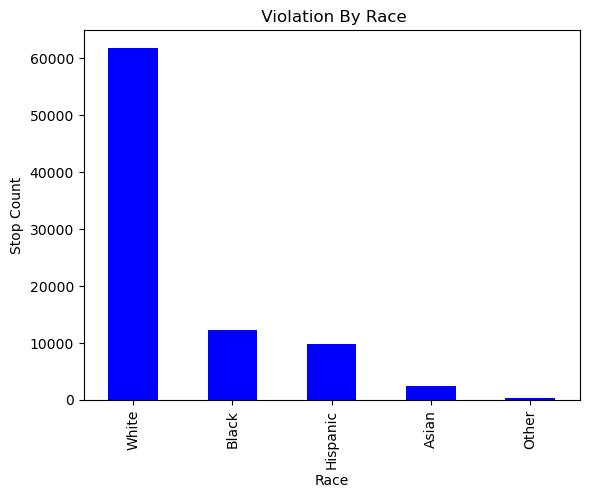

In [107]:
# Violation by race vizualization
police["driver_race"].value_counts().plot(kind = "bar", color = "Blue", title = " Violation By Race")
plt.xlabel("Race")
plt.ylabel("Stop Count")
plt.show()

In [11]:
# Stop outcomes
police["stop_outcome"].value_counts()

Citation            77092
Warning              5137
Arrest Driver        2735
No Action             625
N/D                   607
Arrest Passenger      343
Name: stop_outcome, dtype: int64

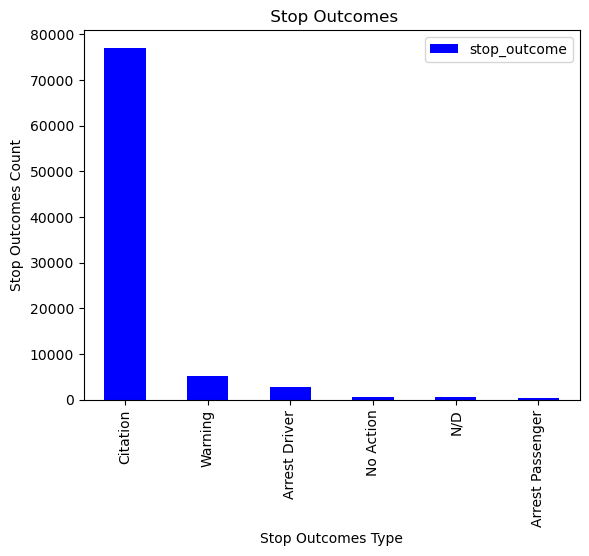

In [26]:
# Stop outcomes vizualization
police["stop_outcome"].value_counts().plot(kind = "bar", color = "Blue", title = " Stop Outcomes")
plt.xlabel("Stop Outcomes Type")
plt.ylabel("Stop Outcomes Count")
plt.legend()
plt.show()

In [27]:
# Stop duration times
police["stop_duration"].value_counts()

0-15 Min     69579
16-30 Min    13740
30+ Min       3220
Name: stop_duration, dtype: int64

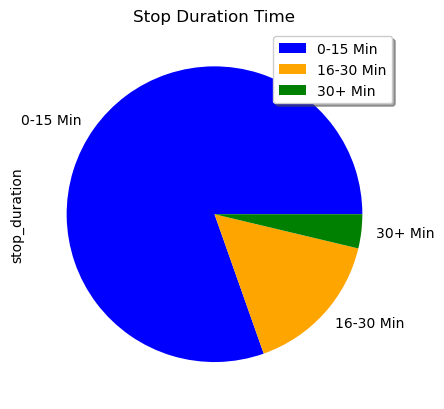

In [35]:
# Stop duration times vizualization
police["stop_duration"].value_counts().plot(kind = "pie", title = "Stop Duration Time", colors = ["Blue", "Orange", "Green"])
plt.legend(loc = "upper right", shadow = True, frameon = True, facecolor = "White")
plt.show()

In [21]:
# Most common date of stops
commonDay = police["stop_date"].dt.date.value_counts()
commonDay

2007-05-16    63
2011-09-03    62
2005-11-04    59
2006-01-09    59
2007-01-04    57
              ..
2005-12-25     1
2005-01-23     1
2011-01-12     1
2010-12-25     1
2005-01-04     1
Name: stop_date, Length: 3757, dtype: int64

#### Question 1. How many different violations were committed by different gender?

In [36]:
# New dataFrame
data1 = police[["driver_gender", "violation"]]

In [43]:
# General data, different violations by gender
dataGroupby = data1.groupby("violation")["driver_gender"].value_counts()
dataGroupby

violation            driver_gender
Equipment            M                 8420
                     F                 2501
Moving violation     M                12938
                     F                 3286
Other                M                 3702
                     F                  707
Registration/plates  M                 2647
                     F                 1056
Seat belt            M                 2278
                     F                  578
Speeding             M                32777
                     F                15646
Name: driver_gender, dtype: int64

#### Analysis & Interpretation
Results of the calculation above show there is evidence that:
* 8420 equipment violations were committed by male and 2501 equipment violations were committed by female
* 12938 moving violations were committed by male and 3286 violations were committed by female
* 3702 the other violations were committed by male and 707 violations were committed by female
* 2647 registration/plates violations were committed by male and 1056 violations were committed by female
* 2278 seat belt violations were committed by male and 578 violations were committed by female
* 32777 Speeding violations were committed by male and 15646 violations were committed by female
  

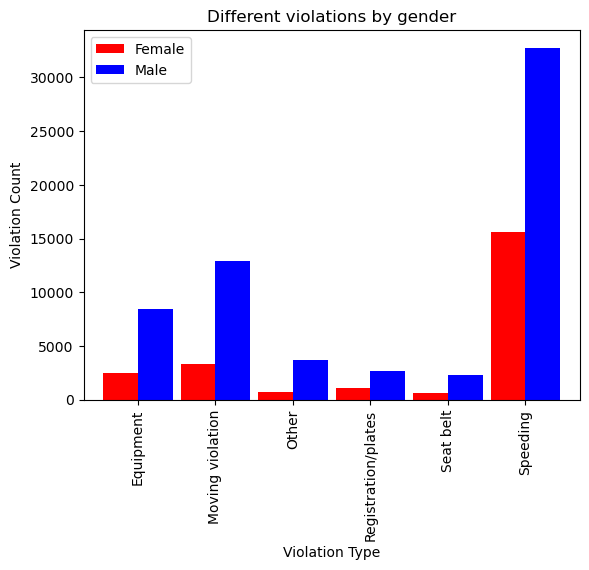

In [47]:
# Ploting vizualization genders commitment to different violations
#plt.figure(figsize = (6,8))
violations_by_sex = data1.groupby("violation")["driver_gender"].value_counts().unstack()
violations_by_sex.plot(kind= "bar", title = "Different violations by gender", color = ["Red", "Blue"], width = 0.9)
plt.legend(["Female", "Male"])
plt.xlabel("Violation Type")
plt.ylabel("Violation Count")
plt.show()

#### Summary & Conclusion
Based on the statistical analysis and observation research in order to calculate how many different violations were committed by different gender:
Therefore we conclude that there is significant evidence that gender affects different violations, which appears that males commit more violations in every violation category than females.

#### Question 2 . Does gender affect who gets a ticket for speeding? In other words who does get more speeding tickets female or male?

In [44]:
data = police[["driver_gender", "violation"]]

In [5]:
# Select speeding row for male and female
speeding = data.loc[data["violation"] == "Speeding"]

In [6]:
# Selecting rows for female speeding
dataF = data.loc[data["driver_gender"] == "F"]
speedingF = dataF.loc[dataF["violation"] == "Speeding"]

In [7]:
# Selecting rows for male speeding
dataM = data.loc[data["driver_gender"] == "M"]
speedingM = dataM.loc[dataM["violation"] == "Speeding"]

In [8]:
# Count total speeding viol
count_speeding = speeding.count()
count_speeding

driver_gender    48423
violation        48424
dtype: int64

In [9]:
# Count female speeding
count_speedingF = speedingF.count()
count_speedingF

driver_gender    15646
violation        15646
dtype: int64

In [10]:
# Count male speeding
count_speedingM = speedingM.count()
count_speedingM

driver_gender    32777
violation        32777
dtype: int64

In [11]:
# Count difference of tickets male vs female
diff = count_speedingM - count_speedingF
diff

driver_gender    17131
violation        17131
dtype: int64

In [84]:
# Probability for female
probabF = round((count_speedingF/count_speeding) * 100, 2)
probabF

driver_gender    32.31
violation        32.31
dtype: float64

In [85]:
# Probability for male
probabM = round((count_speedingM/count_speeding) * 100, 2)
probabM

driver_gender    67.69
violation        67.69
dtype: float64

#### Analysis & Interpretation
Results of the calculation above show there is evidence that:
* Probability that a person who is female got a speeding ticket is 32.31 % and a male gets a speeding ticket is 67.69%.
* Out of 48423 speeding violations, 15646 tickets were given to female drivers, and 32777 tickets were given to male drivers.

In [93]:
# Vizualization tickets count
speeding = police[police["violation"] == "Speeding"].driver_gender.value_counts()
speeding

M    32777
F    15646
Name: driver_gender, dtype: int64

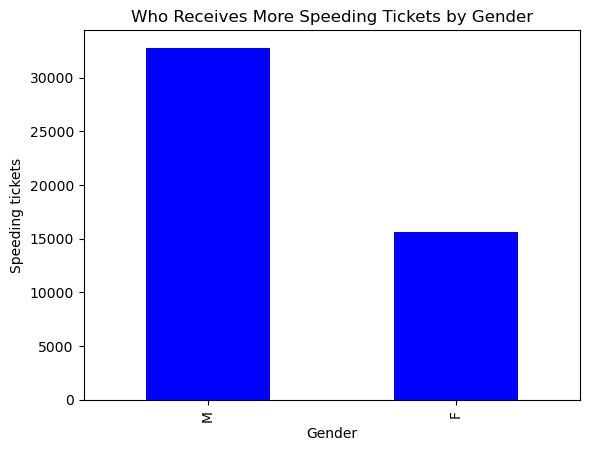

In [92]:
# Vizualization 
speeding = police[police["violation"] == "Speeding"].driver_gender.value_counts()
speeding.plot(kind ="bar", color = "Blue", title = "Who Receives More Speeding Tickets by Gender")
plt.xlabel("Gender")
plt.ylabel("Speeding tickets")
plt.show()

#### Summary & Conclusion
Based on the statistical analysis and observation research in order to calculate the probability that gender affect who gets a ticket for speeding:
* Females got speeding tickets 32.31 % and males get speeding tickets 67.69%.

Therefore we conclude that there is significant evidence that gender affects who receives speeding tickets, that appears that male gets 17131 tickets more speeding tickets than female.

#### Question3. Does gender affect whose vehicle is searched? In other words whose vehicle gets more commonly get searched, male or female?

In [12]:
# Select a new dataFrame
data3 = police[["driver_gender", "search_conducted"]]

In [13]:
# Count total search 
totalSearch = police["search_conducted"].count()
totalSearch

91741

In [14]:
# General count outcome whose been search
dataSumSearch = data3.groupby("search_conducted")["driver_gender"].count()
dataSumSearch

search_conducted
False    83229
True      3307
Name: driver_gender, dtype: int64

In [15]:
# General count outcome whose been search by genred
dataGroupSearch = data3.groupby("search_conducted")["driver_gender"].value_counts()
dataGroupSearch

search_conducted  driver_gender
False             M                59911
                  F                23318
True              M                 2851
                  F                  456
Name: driver_gender, dtype: int64

#### Analysis & Interpretation
Results of the calculation above show there is evidence that:
* Out of 91741 violations, 3307 vehicles have been searched, 83229 have not been searched. 
* 2851 male drivers' vehicles have been searched, and 456 female drivers' vehicles have been searched.
* 59911 male drivers' vehicles have not been searched, and 23318 female drivers' vehicles have not been searched.

#### Probability whose vehicle gets more commonly searched male or female?

In [16]:
# Select row any gender vehicles have been searched
totalS = data3.loc[data3["search_conducted"] == True]

In [17]:
#Selecting rows for male
data3M = data3.loc[data3["driver_gender"] == "M"]

In [18]:
# Selecting for male vehicles search
data3M_NS = data3M.loc[data3M["search_conducted"] == False]
data3M_YS = data3M.loc[data3M["search_conducted"] == True]

In [19]:
#Selecting rows for female
data3F = data3.loc[data3["driver_gender"] == "F"]

In [20]:
# Selecting for female vehicles searched
data3F_NS = data3F.loc[data3F["search_conducted"] == False]
data3F_YS = data3F.loc[data3F["search_conducted"] == True]

In [21]:
# Count any gender vehicles have been searched
countTotalS = totalS.count()
countTotalS

driver_gender       3307
search_conducted    3307
dtype: int64

In [22]:
# Count male vehicles have been searched
count_data3M_YS = data3M_YS.count()
count_data3M_YS

driver_gender       2851
search_conducted    2851
dtype: int64

In [23]:
# Count female vehicles have been searched
count_data3F_YS = data3F_YS.count()
count_data3F_YS

driver_gender       456
search_conducted    456
dtype: int64

In [26]:
# Count difference male vehicles have been searched vs female
diff_count_search = count_data3M_YS - count_data3F_YS
diff_count_search

driver_gender       2395
search_conducted    2395
dtype: int64

In [24]:
# Probability male vehicles have been searched
SearchProbabMale = round((count_data3M_YS/countTotalS) * 100, 2)
SearchProbabMale

driver_gender       86.21
search_conducted    86.21
dtype: float64

In [25]:
# Probability female vehicles have been searched
SearchProbabFemale = round((count_data3F_YS/countTotalS) * 100, 2)
SearchProbabFemale

driver_gender       13.79
search_conducted    13.79
dtype: float64

#### Analysis & Interpretation
Results of the calculation above show there is evidence that:
* Probability male vehicles get searched is 86.21% compared female vehicles get searched is 13.79%. 

In [80]:
# Vizualization count
search = police[police["search_conducted"] == True].driver_gender.value_counts()
search

M    2851
F     456
Name: driver_gender, dtype: int64

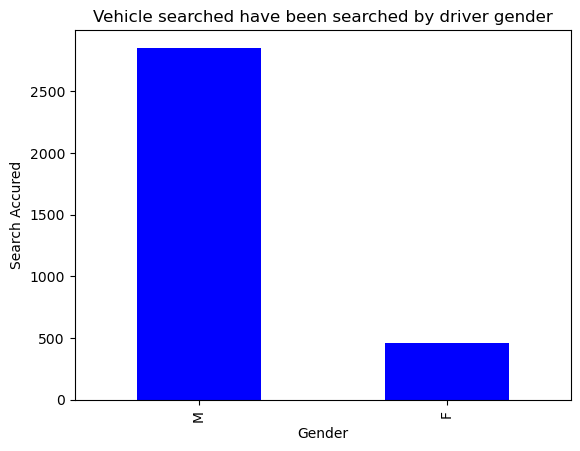

In [103]:
# Vizualization
search = police[police["search_conducted"] == True].driver_gender.value_counts()
search.plot(kind ="bar", color = "Blue", title = "Vehicle searched have been searched by driver gender")
plt.xlabel("Gender")
plt.ylabel("Search Accured")
plt.show()

#### Summary & Conclusion
Based on the statistical analysis and observation research in order to calculate whose vehicle gets more commonly searched male or female:
* There is strong evidence that male vehicles have been searched 86.21% while female vehicles get searched is 13.79%.
* There is strong evidence that 2851 male drivers' vehicles have been searched, and 456 female drivers' vehicles have been searched.
* There is strong evidence that 59911 male drivers' vehicles have not been searched, and 23318 female drivers' vehicles have not been searched.

Therefore we conclude that there is significant evidence that male vehicle gets more commonly searched than females.

#### Question 4. Does gender affect whose vehicle was being stopped related to drugs? What is the Probability whose vehicle was being stopped related to drugs?

In [28]:
# Select a new dataFrame
data4 = police[["driver_gender", "drugs_related_stop"]]

In [29]:
# Count total stops
totalStop = data4["drugs_related_stop"].count()
totalStop

91741

In [30]:
# General count outcome whose been stoped drug related
dataDrugStop = data4.groupby("drugs_related_stop")["driver_gender"].count()
dataDrugStop

drugs_related_stop
False    85674
True       862
Name: driver_gender, dtype: int64

In [31]:
#General count outcome whose been stoped drug related by gender
dataStopDrugByGender = data4.groupby("drugs_related_stop")["driver_gender"].value_counts()
dataStopDrugByGender

drugs_related_stop  driver_gender
False               M                62007
                    F                23667
True                M                  755
                    F                  107
Name: driver_gender, dtype: int64

#### Analysis & Interpretation
Results of the calculation above show there is evidence that:
* Out of 91741 total drives, 862 vehicles have been stopped drug-related. 
* 755 vehicles were driven by male drives and 107 vehicles were driven by female drivers

#### What is the Probability whose vehicle was being stopped related to drugs?¶

In [9]:
data4 = police[["driver_gender", "drugs_related_stop"]]

In [10]:
# Select row any gender vehicles have been drug related stop
totalDRS = data4.loc[data4["drugs_related_stop"] == True]

In [11]:
#Selecting rows for male and female in new dataFrame
data4M = data4.loc[data4["driver_gender"] == "M"]
data4F = data4.loc[data4["driver_gender"] == "F"]

In [12]:
# Selecting for whose vehicles were being drug related stopped for each gender
data4MDS = data4M.loc[data4M["drugs_related_stop"] == True]
data4FDS = data4F.loc[data4F["drugs_related_stop"] == True]

In [13]:
# Count total drug related stops for both genders
countTotalDRS = totalDRS.count()
countTotalDRS

driver_gender         862
drugs_related_stop    862
dtype: int64

In [14]:
# Count total drug related stops for male
countData4MDS = data4MDS.count()
countData4MDS

driver_gender         755
drugs_related_stop    755
dtype: int64

In [15]:
# Count total drug related stops for female
countData4FDS = data4FDS.count()
countData4FDS

driver_gender         107
drugs_related_stop    107
dtype: int64

In [16]:
# Count difference drug related stops for male vs female
diff_count_DRS = countData4MDS - countData4FDS
diff_count_DRS

driver_gender         648
drugs_related_stop    648
dtype: int64

In [17]:
# Probability drug related stops for male drives
ProbabDrugRelStopM = round((countData4MDS/countTotalDRS) * 100, 2)
ProbabDrugRelStopM

driver_gender         87.59
drugs_related_stop    87.59
dtype: float64

In [18]:
# Probability drug related stops for female drivers
ProbabDrugRelStopF = round((countData4FDS/countTotalDRS) * 100, 2)
ProbabDrugRelStopF

driver_gender         12.41
drugs_related_stop    12.41
dtype: float64

#### Analysis & Interpretation
Results of the calculation above show there is evidence that:
* There is 87.59% Probability that vehicles have been stopped drug-related if driver is male. 
* There is 12.41% Probability that vehicles have been stopped drug-related if driver is female.

In [19]:
# Vizualization count numbers
drug_stop = police[police["drugs_related_stop"] == True].driver_gender.value_counts()
drug_stop

M    755
F    107
Name: driver_gender, dtype: int64

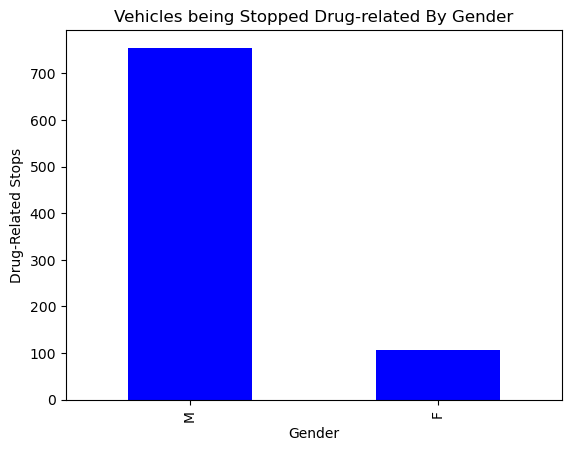

In [20]:
# Vizualization
drug_stop = police[police["drugs_related_stop"] == True].driver_gender.value_counts()
drug_stop.plot(kind ="bar", color = "Blue", title = "Vehicles being Stopped Drug-related By Gender")
plt.xlabel("Gender")
plt.ylabel("Drug-Related Stops")
plt.show()

#### Summary & Conclusion
Based on the statistical analysis and observation research in order to calculate whose vehicle gets more commonly stopped drug related male or female:
* There is strong evidence that vehicles have been stopped drug related 87.59% for male drivers and 12.41% for female drivers. 

Therefore we conclude that there is significant evidence that male vehicle gets more commonly drug related stopped than females.

####  Question 5. Distributions of overall stop outcomes by each year in order to see if traffic violation is increasing over the years of study, in order to see if traffic violations were increased through years of study.


In [3]:
pd.to_datetime(police["stop_date" ])

0       2005-01-04
1       2005-01-23
2       2005-02-17
3       2005-02-20
4       2005-02-24
           ...    
91736   2015-12-31
91737   2015-12-31
91738   2015-12-31
91739   2015-12-31
91740   2015-12-31
Name: stop_date, Length: 91741, dtype: datetime64[ns]

In [4]:
# Changing column stop_date from object to datetime variables in dataFrame
police["stop_date"] = pd.to_datetime(police["stop_date" ])

In [5]:
# Changing column stop_time from object to datetime variables in dataFrame
police["stop_time"] = pd.to_datetime(police["stop_time" ])

In [6]:
# info
police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   state               91741 non-null  object        
 1   stop_date           91741 non-null  datetime64[ns]
 2   stop_time           91741 non-null  datetime64[ns]
 3   county_name         0 non-null      float64       
 4   driver_gender       86536 non-null  object        
 5   driver_race         86539 non-null  object        
 6   violation_raw       86539 non-null  object        
 7   violation           86539 non-null  object        
 8   search_conducted    91741 non-null  bool          
 9   search_type         3307 non-null   object        
 10  stop_outcome        86539 non-null  object        
 11  is_arrested         86539 non-null  object        
 12  stop_duration       86539 non-null  object        
 13  drugs_related_stop  91741 non-null  bool      

In [7]:
# Countiong violation stops count by year
byYear = police["stop_date" ].dt.year.value_counts(ascending = False)
byYear

2012    10972
2006    10560
2007     9575
2014     9036
2008     8860
2015     8399
2011     8301
2013     8060
2009     7820
2010     7654
2005     2504
Name: stop_date, dtype: int64

#### Analysis & Interpretation
Results of the calculation above show there is evidence that:
* 2012 police stopped 10972 vehicles 
* in 2006 stopped 10560 vehicles 
* in 2007 stopped 9575 vehicles
* in 2014 stopped 9036 vehicles 
* in 2008 stopped  8860 vehicles 
* in 2015 stopped 8399 vehicles 
* in 2011 stopped 8301 vehicles
* in 2013 stopped 8060 vehicles 
* in 2009 stopped 7820 vehicles 
* in 2010 stopped 7654 vehicles
* in 2005 2504 vehicles were stopped 

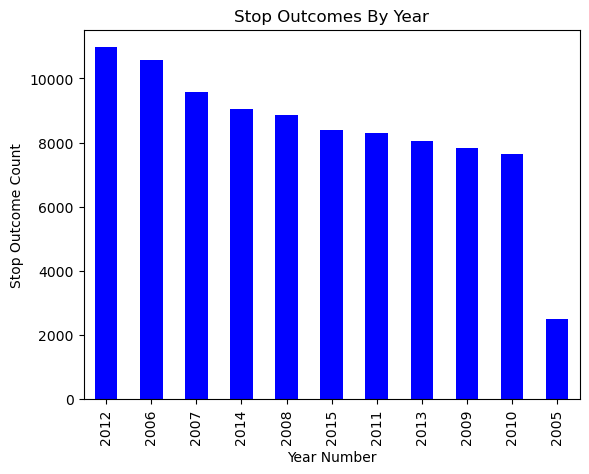

In [15]:
# Vizualiztion stops outcomes by year
byYear.plot(kind = "bar", color = "Blue", title = "Stop Outcomes By Year")
plt.xlabel("Year Number")
plt.ylabel("Stop Outcome Count")
plt.show()

#### Summary & Conclusion
Based on the statistical analysis and observation research in order to calculate distribution of overall stop outcomes by each year in order to see if traffic violation is increasing over the years of study, in order to see if traffic violations were increased through years of study.

Therefore we conclude that there is significant evidence that most stops were between 10:00 – 10:59 (7402 stops), between 9:00 – 9:59 (6738 stops), and between 11:00 – 11:59 (5996 stops). Least stops were indicated between 3:00 – 3:59 (1166 stops), between 4:00 – 4:59 (290 stops), and between 5:00 – 5:59 (218 stops).  Stop time outcome (represents in military time).

#### Question 6. How the time of the day affects stop outcomes? in other words is there a specific time of the day with a high volume of traffic violations?

In [48]:
# Most common stop time
byTime = police["stop_time"].dt.hour.value_counts(ascending = False)
byTime

10    7402
9     6738
11    5996
14    5613
23    5544
8     5218
0     5206
15    5017
13    4787
7     4561
1     4409
16    3754
12    3665
22    3649
20    3334
6     3210
2     2942
17    2780
19    2573
18    2214
21    1455
3     1166
4      290
5      218
Name: stop_time, dtype: int64

#### Analysis & Interpretation
Results of the calculation above show there is evidence that:
* 10:00 – 10:59	7402 stops
* 9:00 – 9:59	6738 stops
* 11:00 – 11:59	5996 stops
* 14:00 – 14:59	5613 stops
* 23:00 – 23:59	5544 stops
* 8:00 – 8:59	5218 stops
* 00:00 – 00:59	5206 stops
* 15:00 – 15:59	5017 stops
* 13:00 – 13:59	4787 stops
* 7:00 – 7:59	4561 stops
* 1:00 – 1:59	4409 stops
* 16:00 – 16:59	3754 stops
* 12:00 – 12:59	3665 stops
* 22:00 – 22:59	3649 stops
* 20:00 – 20:59	3334 stops
* 6:00 – 6:59	3210 stops
* 2:00 – 2:59	2942 stops
* 17:00 – 17:59	2780 stops
* 19:00 – 19:59	2573 stops
* 18:00 – 18:59	2214 stops
* 21:00 – 21:59	1455 stops
* 3:00 – 3:59	1166 stops
* 4:00 – 4:59	290 stops
* 5:00 – 5:59	218 stops


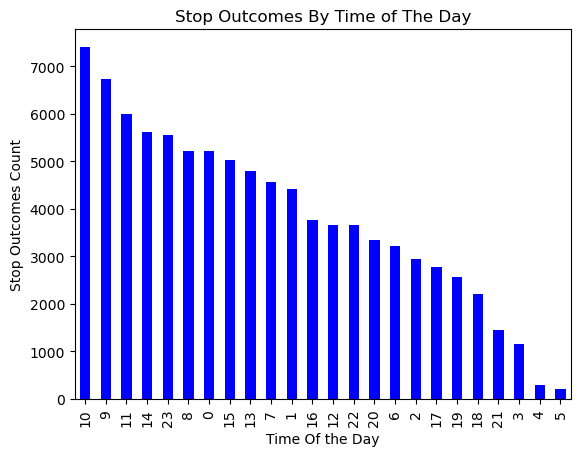

In [49]:
# Vizualization most common stop time
byTime.plot(kind = "bar", color = "Blue", title = "Stop Outcomes By Time of The Day")
plt.xlabel("Time Of the Day")
plt.ylabel("Stop Outcomes Count")
plt.show()

#### Summary & Conclusion
Based on the statistical analysis and observation research in order to calculate how the time of the day affects stop outcomes? in other words is there a specific time of the day with a high volume of traffic violations?

Based on the statistical analysis and observation research in order to calculate and summarize stop outcomes by the time, and how the time of the day affects stop outcomes, we received results that most stops were between 10:00 – 10:59 (7402 stops), between 9:00 – 9:59 (6738 stops), and between 11:00 – 11:59 (5996 stops). Least stops were indicated between 3:00 – 3:59 (1166 stops), between 4:00 – 4:59 (290 stops), and between 5:00 – 5:59 (218 stops).  Figure 2.5 shows overall summary stop time outcome (represents in military time).
Based on the received numbers, there is significant evidence to conclude that the highest number of all drives were stopped between 9:00 – 11:59 am and the lowest number of drives were stopped between 3:00 – 5:59 am. We also can conclude that drivers commit more traffic violations in the morning time and fewer violations in the nighttime. 


#### Question 7. How does the day of the week affects stop outcomes, in other words on which day of the week do drives commit more traffic violation; 

In [20]:
# common stops by day of the week: 
# Monday = 0, Tuesday = 1, Wednesday = 2, Thursday = 3, Friday = 4
# Saturday = 5, Sunday = 6
byDayOfWeek =  police["stop_date"].dt.dayofweek.value_counts(ascending = False)
byDayOfWeek

5    14189
6    13357
0    13193
4    12998
1    12835
2    12624
3    12545
Name: stop_date, dtype: int64

#### Analysis & Interpretation
Results of the calculation above show there is evidence that:
* Saturday 14189 vehicles 
* on Sunday 13357 vehicles 
* on Monday 13193 vehicles
* on Friday 12998
* on Tuesday 12835
* on Wednesday 12624 
* on Thursday 12545 vehicles

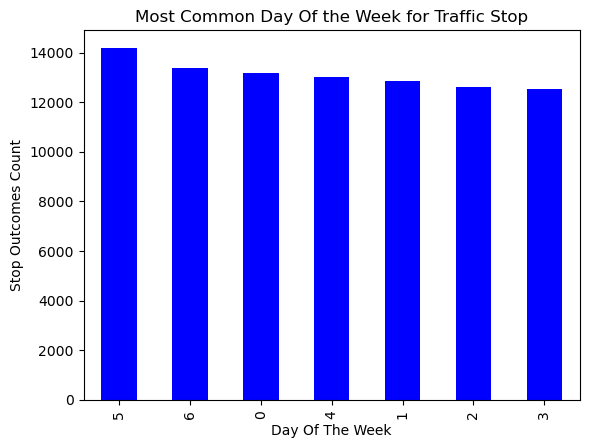

In [26]:
# Vizualization of common stops by day of the week: 
# Monday = 0, Tuesday = 1, Wednesday = 2, Thursday = 3, Friday = 4
# Saturday = 5, Sunday = 6
byDayOfWeek.plot(kind = "bar", color = "Blue", title = "Most Common Day Of the Week for Traffic Stop")
plt.xlabel("Day Of The Week")
plt.ylabel("Stop Outcomes Count")
plt.show()

#### Summary & Conclusion
Based on the statistical analysis and observation research in order to calculate how does the day of the week affects stop outcomes, in other words on which day of the week do drives commit more traffic violation.

Therefore we conclude that there is significant evidence based on the received numbers that day of the week affect stop outcomes because the highest number of all drives were stopped on Saturday and Sunday and least stopped occurred on Wednesday and Thursday. 

#### Question 8. Distribution of stop outcomes by month of the year by summarizing total outcome by each month of each year

In [12]:
# Stop outcomes count by month
byMonth = police["stop_date"].dt.month.value_counts(ascending = False)
byMonth

1     8387
11    8008
5     7881
3     7755
10    7751
7     7658
8     7614
9     7611
6     7570
4     7405
12    7109
2     6992
Name: stop_date, dtype: int64

#### Analysis & Interpretation
Results of the calculation above show there is evidence that:
* in January were 8387 stop outcomes 
* in November were 8008 stop outcomes 
* in May were 7881 stop outcomes
* in March were 7755 stop outcomes 
* in October were 7751 stop outcomes 
* in July 7658 stop outcomes
* in August were 7614 stop outcomes 
* in September were 7611 stop outcomes 
* in June were 7570 stop outcomes 
* in April were 7405 stop outcomes
* in December were 7109 stop outcomes
* in February were 6992 stop outcomes

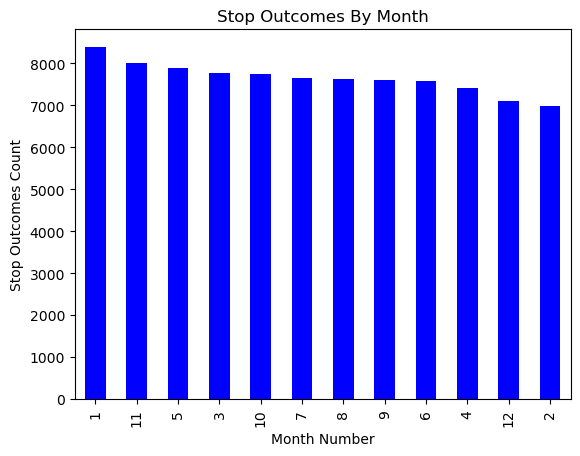

In [14]:
# Vizualization of stop outcomes by month
byMonth.plot(kind = "bar", color = "Blue", title = "Stop Outcomes By Month")
plt.xlabel("Month Number")
plt.ylabel("Stop Outcomes Count")
plt.show()

In [39]:
# Stop outcomes count by month top 3 
byMonthTop3 = police["stop_date"].dt.month.value_counts(ascending = False).head(3)
byMonthTop3

1     8387
11    8008
5     7881
Name: stop_date, dtype: int64

In [40]:
# Stop outcomes count by month last 3 
byMonthlast3 = police["stop_date"].dt.month.value_counts(ascending = False).tail(3)
byMonthlast3

4     7405
12    7109
2     6992
Name: stop_date, dtype: int64

#### Summary & Conclusion
Based on the statistical analysis and observation research in order to calculate distribution of stop outcomes by month of the year by summarizing total outcome by each month of each year;

Therefore we conclude that there is significant evidence that there is not seasonal traffic stops escalation, because the highest volume of traffic stops occurred in January (8387 stops), November (8008 stops) and May (7881 stops) and the lowest volume occurred in April (7405 stops), December (7109), and February (6992). 

### End